# Limpando os dados

In [142]:
import csv
import pandas as pd

data = []
with open('demandas.csv', 'r') as csvfile:
    spamreader = csv.reader(csvfile, delimiter=';', quotechar='"')
    data = list(spamreader)
    for x in range(len(data)):
        data[x] = [y.replace(";", ",").rstrip() for y in data[x]]        

df = pd.DataFrame(data[1:], columns = data[0])
df['abertura'] =  pd.to_datetime(df['abertura'], format='%Y-%m-%d')

df.loc[df['origem'] == 'Facebook - 1', 'origem'] = 'Facebook'
df.loc[df['origem'] == 'Facebook - 2', 'origem'] = 'Facebook'

#df.head(10)
df.describe()

,abertura,tipo,solicitacao,descricao,tipo_solicitacao,origem,situacao
count,7695,7695,7695,7695,7695,7695,7695
unique,535,97,7316,40,6,10,2
top,2017-02-06 00:00:00,Iluminação Pública Irregular,moradores denuncia uma casa que esta para vend...,Centro,Solicitação de Serviço,Telefone,Fechado
freq,52,1664,43,1337,4267,4709,6043
first,2015-10-02 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN
last,2017-10-25 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN


# Origem dos chamados

Radio escuta                  1
Colab                         1
Instagram                     3
Email                        49
Audiências Públicas          69
Lai                         113
Portal da transparência     306
Presencial                 1113
Facebook                   1331
Telefone                   4709
Name: origem, dtype: int64


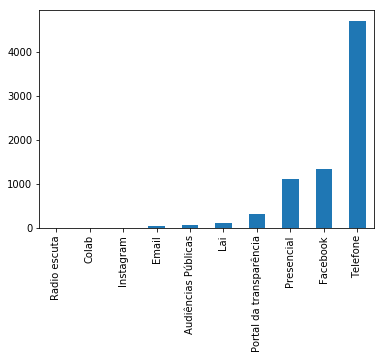

In [218]:
%matplotlib inline

import matplotlib.pyplot as plt

origem = df['origem'].value_counts()
#origem['Facebook'] = origem['Facebook - 1'] + origem['Facebook - 2']
#del(origem['Facebook - 1'])
#del(origem['Facebook - 2'])
origem = origem.sort_values()
print(origem)
origem.plot(kind="bar")

# O uso do Facebook aumentou com o tempo?

In [225]:
facebook = df.loc[df['origem'] == 'Facebook']['abertura'].value_counts().sort_index()
facebook.describe()

count    357.000000
mean       3.728291
std        3.336319
min        1.000000
25%        2.000000
50%        3.000000
75%        5.000000
max       31.000000
Name: abertura, dtype: float64

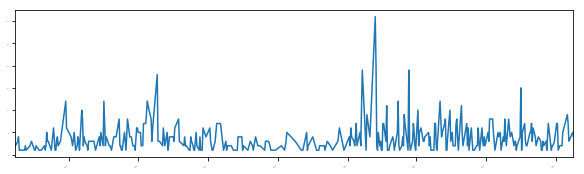

In [216]:
facebook.plot(kind="line", figsize=(10, 3), fontsize=1)

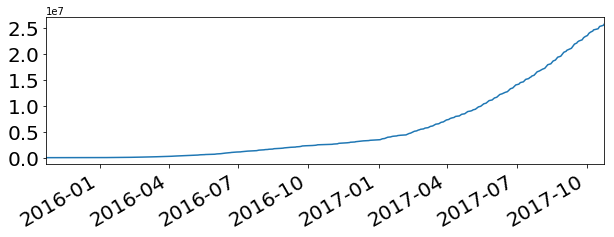

In [213]:
facebook = facebook.cumsum()
facebook.plot(kind="line", figsize=(10, 3), fontsize=20)

# O uso do Telefone diminuiu com o tempo?

In [224]:
telefone = df.loc[df['origem'] == 'Telefone']['abertura'].value_counts().sort_index()
telefone.describe()

count    502.000000
mean       9.380478
std        5.655148
min        1.000000
25%        6.000000
50%        8.000000
75%       12.000000
max       47.000000
Name: abertura, dtype: float64

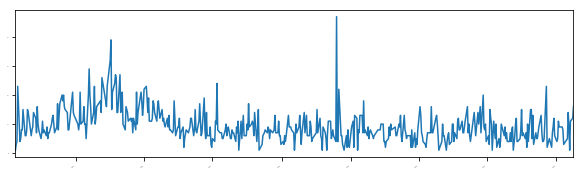

In [217]:
telefone.plot(kind="line", figsize=(10, 3), fontsize=1)

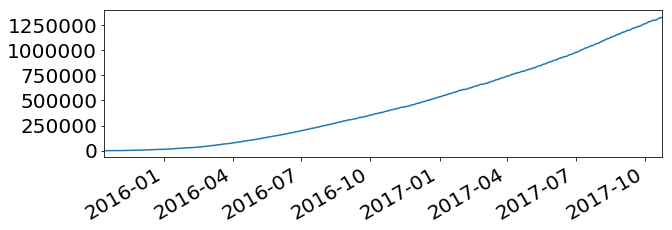

In [215]:
telefone = telefone.cumsum()
telefone.plot(kind="line", figsize=(10, 3), fontsize=20)

# O uso do Presencial diminuiu com o tempo?

In [223]:
presencial = df.loc[df['origem'] == 'Presencial']['abertura'].value_counts().sort_index()
presencial.describe()

count    432.000000
mean       2.576389
std        1.736385
min        1.000000
25%        1.000000
50%        2.000000
75%        3.000000
max       15.000000
Name: abertura, dtype: float64

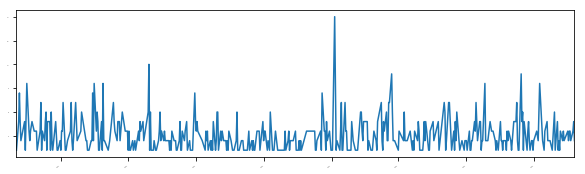

In [219]:
presencial.plot(kind="line", figsize=(10, 3), fontsize=1)

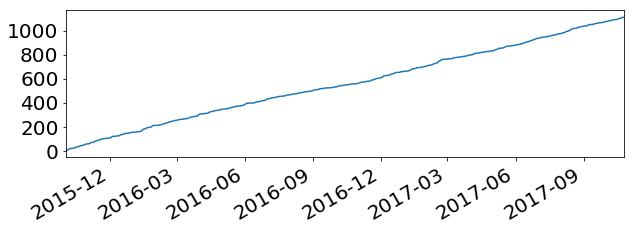

In [220]:
presencial = presencial.cumsum()
presencial.plot(kind="line", figsize=(10, 3), fontsize=20)

2015-10-02       1
2015-10-05       5
2015-10-06      12
2015-10-07      16
2015-10-08      18
2015-10-13      22
2015-10-14      23
2015-10-16      31
2015-10-19      34
2015-10-20      36
2015-10-21      39
2015-10-23      43
2015-10-26      46
2015-10-27      49
2015-10-28      52
2015-10-29      55
2015-10-30      56
2015-11-03      59
2015-11-04      65
2015-11-05      66
2015-11-06      69
2015-11-09      71
2015-11-10      75
2015-11-11      80
2015-11-12      81
2015-11-13      85
2015-11-16      89
2015-11-17      90
2015-11-18      95
2015-11-19      97
              ... 
2017-08-31    1037
2017-09-04    1040
2017-09-06    1042
2017-09-08    1050
2017-09-12    1052
2017-09-14    1053
2017-09-15    1056
2017-09-18    1060
2017-09-19    1062
2017-09-21    1064
2017-09-22    1066
2017-09-25    1067
2017-09-28    1072
2017-09-29    1073
2017-10-02    1077
2017-10-03    1078
2017-10-04    1080
2017-10-05    1081
2017-10-06    1084
2017-10-09    1086
2017-10-10    1089
2017-10-11  